# LSA
* TMD에 특이값 분해를 적용하여 차원 축소

In [1]:
import pandas as pd
from sklearn.externals import joblib

In [2]:
with open('data/amazon.pkl','rb') as f:
    data = joblib.load(f)
locals().update(data)
tdm.shape

(1000, 1000)

* 특이값 분해 기반 차원축소

In [16]:
from sklearn.decomposition import TruncatedSVD

In [17]:
# 몇개로 차원축소 할건지
# 상관관계가 있는 변수들끼리 묶어서 변수를 줄이는 것
svd = TruncatedSVD(n_components=30)

In [18]:
pos = svd.fit_transform(tdm)
pos.shape

(1000, 30)

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline

* 긍정 파랑, 부정 빨강

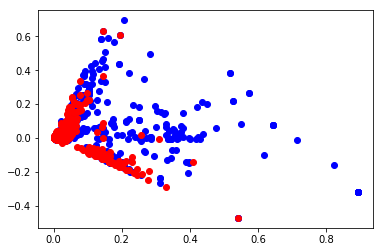

In [20]:
dim1 = 0
dim2 = 1
# sentiment란 ? 
# Lsa는 리뷰가 길면 긴놈끼리 작으면 작은놈끼리 묶으려고 한다.
plt.plot(pos[sentiment==1, dim1], pos[sentiment==1, dim2], 'bo') # blue o 긍정
plt.plot(pos[sentiment==0, dim1], pos[sentiment==0, dim2], 'ro') # red o 부정

In [21]:
# 문장의 길이로 판단하므로 노멀라징 해줘야됨
from sklearn.preprocessing import Normalizer

In [22]:
norm = Normalizer(copy=False) # copy=false 

In [23]:
pos2 = norm.fit_transform(pos)
pos2

array([[ 0.09981419,  0.0363294 ,  0.02920138, ..., -0.27306701,
        -0.20946159,  0.1327569 ],
       [ 0.14502842,  0.45707893,  0.27587708, ...,  0.00170948,
        -0.03397866,  0.07134408],
       [ 0.71790463, -0.01381705, -0.52337381, ...,  0.05000635,
        -0.00819703,  0.04627595],
       ...,
       [ 0.06659302,  0.03830959,  0.0270217 , ..., -0.19876004,
         0.01017141, -0.26704259],
       [ 0.06022326,  0.01402604,  0.08023949, ..., -0.45725976,
        -0.284289  , -0.23820006],
       [ 0.0667071 ,  0.00833265,  0.03851362, ..., -0.15359281,
        -0.19592887, -0.10643887]])

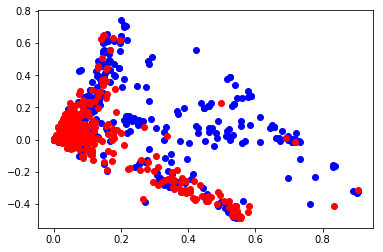

In [24]:
plt.plot(pos2[sentiment==1, dim1], pos2[sentiment==1, dim2], 'bo')
plt.plot(pos2[sentiment==0, dim1], pos2[sentiment==0, dim2], 'ro')

In [26]:
from sklearn.pipeline import make_pipeline
svd = TruncatedSVD(n_components=30)
svd.fit_transform(tdm)
norm = Normalizer(copy=False)
# 순서대로
# attribute error 뜨면 다시 피팅해준후 파이프라인 만들기
lsa = make_pipeline(svd, norm)
lsa.transform(tdm)

array([[ 0.09308679,  0.03317713,  0.02711521, ..., -0.07285269,
         0.07877779,  0.57260476],
       [ 0.1450874 ,  0.45722189,  0.27589407, ...,  0.11845426,
        -0.08846186, -0.00354616],
       [ 0.71623325, -0.01375928, -0.52206576, ...,  0.04036644,
        -0.03032257, -0.08539046],
       ...,
       [ 0.06558962,  0.03789403,  0.0267605 , ..., -0.10015553,
         0.00675252,  0.13809829],
       [ 0.06148933,  0.0136802 ,  0.08141561, ..., -0.50299502,
        -0.334374  ,  0.22286627],
       [ 0.06632415,  0.00805211,  0.03806343, ..., -0.21914361,
        -0.01506869,  0.2372145 ]])

# LDA

토픽은 단어들의 집합으로 이루어졌다.
하나의 문서에서 여러개의 주제어가 섞일수 있다-> 그러므로 주제어가 확률로 나온다


In [29]:
import pandas as pd
from sklearn.externals import joblib

In [31]:
def get_nouns():
    pass

with open('data/hot-news.pkl', 'rb') as f:
    data = joblib.load(f)
locals().update(data)

In [32]:
words = vectorizer.get_feature_names()

In [33]:
# 딕셔너리를 만들려면 어레이가 필요하므로 enumerate를 붙여준다.
enumerate(words)
word_dict = dict(enumerate(words))
word_dict[3]

'가격'

In [36]:
!pip install gensim

  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\p\AppData\Local\pip\Cache\wheels\23\00\44\e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file: started
  Running setup.py bdist_wheel for bz2file: finished with status 'done'
  Stored in directory: C:\Users\p\AppData\Local\pip\Cache\wheels\81\75\d6\e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [38]:
# tem을 젠신형태로 바꿔야 하는데 ...
from gensim.matutils import Sparse2Corpus

In [39]:
# tdm 단어,문서 gensim은 문서,단어
corpus = Sparse2Corpus(tdm.T)

In [42]:
from gensim.models.ldamodel import LdaModel

* num_topics : 주제의 수
* passes, itreations : 계산횟수 -> 증가시키면 안정적

In [45]:
# 토픽수는 실험을 해봐야 한다. 토픽수를 결정하는 법이 있는데.... 월요일에~!
# passes 는 전체를 몇번 통과 시킬지 -> 확률 분포에 맞게 난수를 만드는데 (비슷한 단어가 나오면 하나로 묶는다. passes를 많이주면
#  주제를 많이 주는것과 같다.)
#  iteration = 패스를 진행 다하면 이터레이션 ( 이터레이션은 수정된 모델을 가지고 진행함)
#  id2word 해당되는 단어를 보기위해 딕셔너리 형태의 단어 배열을 넣는다.
#  randomstate 안쓰면 실행할 떼마다 결과 값이 달라진다.
lda = LdaModel(corpus=corpus, num_topics=100, passes=3, 
               iterations=100, id2word=word_dict, random_state=1234)

C:\Users\p\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [48]:
lda.show_topic(0)

[('사업', 0.18424447),
 ('교육', 0.11373187),
 ('실시', 0.04699194),
 ('안전사고', 0.042204987),
 ('환경', 0.042078584),
 ('예방', 0.036211457),
 ('출시', 0.034476377),
 ('국내', 0.03379465),
 ('추진', 0.03368742),
 ('지원', 0.031945124)]

In [51]:
lda.show_topic(1)

[('마리', 0.09537138),
 ('방송', 0.07557634),
 ('개최', 0.07466629),
 ('사용량', 0.06591126),
 ('.kr', 0.05524337),
 ('참석', 0.04998682),
 ('지사', 0.049052607),
 ('이날', 0.046455033),
 ('.co', 0.04377212),
 ('폭염', 0.04282706)]

In [49]:
lda.show_topic(2)

[('폭염', 0.110477835),
 ('원인', 0.110442065),
 ('부담', 0.10448278),
 ('지적', 0.09525518),
 ('추정', 0.08881684),
 ('정책', 0.08141164),
 ('생각', 0.07558871),
 ('일시', 0.06341445),
 ('사태', 0.059574977),
 ('중단', 0.03047592)]

In [52]:
raw = tdm[0]
# 383인덱스의 단어가 1번, 249인덱스의 단어가 2번
doc = list(zip(raw.indices, raw.data))
doc

[(383, 1), (982, 1), (519, 1), (715, 1), (914, 1), (821, 1), (57, 2), (240, 2)]

In [32]:
# 인덱스에 있는 단어를 네임으로 바꾸어주는 과정
doc_words = [(words[i], n) for i, n in doc]
doc_words

[('사상', 1),
 ('환경', 1),
 ('안전', 1),
 ('재난', 1),
 ('폭염', 1),
 ('지진', 1),
 ('경남', 2),
 ('도민', 2)]

In [33]:
# 0번쩨 문서는 14번주제와 관련이 있다. 여기서 0번째는 tdm[0]에서 따오는듯 함

lda.get_document_topics(doc)

[(14, 0.23057149201588123),
 (32, 0.061353827393171703),
 (35, 0.15351132004681189),
 (46, 0.095403291534091772),
 (70, 0.19022956456841825),
 (73, 0.090159449024189611),
 (76, 0.094225600871982451)]

In [53]:
lda.show_topic(14)

[('폭염', 0.20705894),
 ('주의보', 0.12350757),
 ('경보', 0.0834265),
 ('발령', 0.064179495),
 ('지역', 0.037905075),
 ('이상', 0.036558997),
 ('기온', 0.032702398),
 ('경남', 0.029287208),
 ('이틀', 0.026935965),
 ('최고', 0.02670432)]

In [55]:
lda.show_topic(70)

[('도내', 0.43591157),
 ('습도', 0.16815743),
 ('기사', 0.14656232),
 ('도민', 0.12571648),
 ('폭염', 0.03771026),
 ('관련', 0.033246964),
 ('환경', 0.008186748),
 ('여름', 0.005653221),
 ('올해', 0.0055419737),
 ('더위', 0.0029653984)]

In [57]:
# 한글폴더라서 저장이 안된듯
lda.save('hot_news.lda') 

In [58]:
from gensim.models.ldamodel import LdaModel

In [60]:
lda2 = LdaModel.load('hot_news.lda')

In [61]:
lda2.get_document_topics(doc)

[(14, 0.23006211),
 (32, 0.07419876),
 (35, 0.14597939),
 (46, 0.09548998),
 (70, 0.27455238),
 (76, 0.09426283)]